Draft to measure emmsion lines. Make model line, convolve model by appropriate lsf, fit to spectrum.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from scipy.interpolate import interpolate
from craftroom import resample
from astropy.convolution import convolve, Box1DKernel
from astropy.modeling import models, fitting
from scipy.optimize import leastsq
from astropy.modeling import functional_models

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20


In [13]:
path = '/media/david/1tb_storage1/emergency_data/mega_muscles/v01_seds/'

In [72]:
hdul = fits.open('{}hlsp_muscles_multi_multi_gj15a_broadband_v1_var-res-sed.fits'.format(path))

In [73]:
data = hdul[1].data
inst_list = hdul[2].data
inst_list

FITS_rec([( 65536, 'MOD', 'LYA', 'YOUNG', 'hlsp_muscles_mod_lya_gj15a_young_v1_component-spec.fits'),
          (    16, 'HST', 'STS', 'E140M', 'hlsp_muscles_hst_sts_gj15a_e140m_v1_component-spec.fits'),
          (524288, 'HST', 'STS', 'G230LB', 'hlsp_muscles_hst_sts_gj15a_g230lb_v1_component-spec.fits'),
          (131072, 'MOD', 'PHX', 'NA', 'hlsp_muscles_mod_phx_gj15a_na_v1_component-spec.fits'),
          (   256, 'HST', 'STS', 'G430L', 'hlsp_muscles_hst_sts_gj15a_g430l_v1_component-spec.fits'),
          (131072, 'MOD', 'PHX', 'NA', 'hlsp_muscles_mod_phx_gj15a_na_v1_component-spec.fits'),
          (  8192, 'CXO', 'ACS', 'NA', 'hlsp_muscles_cxo_acs_gj15a_na_v1_component-spec.fits'),
          ( 32768, 'MOD', 'APC', 'NA', 'hlsp_muscles_mod_apc_gj15a_na_v1_component-spec.fits'),
          ( 16384, 'MOD', 'EUV', 'YOUNG', 'hlsp_muscles_mod_euv_gj15a_young_v1_component-spec.fits')],
         dtype=(numpy.record, [('BITVALUE', '>i8'), ('TELESCOPE', 'S3'), ('INSTRUMENT', 'S3'), ('GRATIN

In [74]:
mask = (data['WAVELENGTH'] > 1160) & (data['WAVELENGTH'] < 2000) & (data['INSTRUMENT'] != 65536)

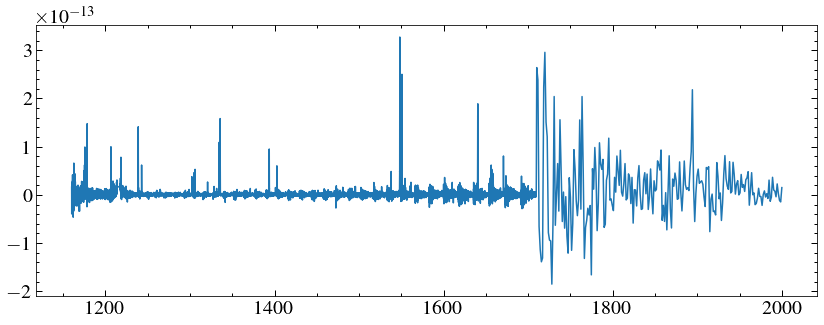

In [75]:
plt.plot(data['WAVELENGTH'][mask], data['FLUX'][mask])

In [63]:
line_list = Table.read('all_linelist.csv')

(1160.0, 1700.0)

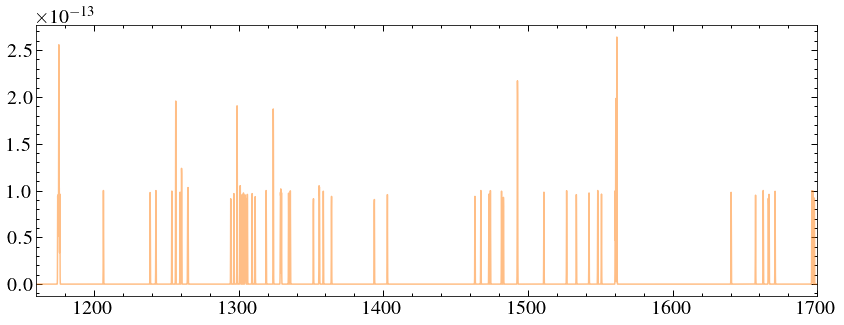

In [55]:
mod1 = models.Const1D(0)
for i in range(len(line_list)):
    amp = 1e-13
#     if line_list['Likelihood to measure'][i] == 'Low':
#         amp = amp/3
#     if line_list['Likelihood to measure'][i] == 'Medium':
#         amp = amp/2
    if line_list['Likelihood to measure'][i] in ['High', 'Medium']:
#     mod1 = mod1+ functional_models.Voigt1D(x_0=line_list['Wavelength'][i], amplitude_L=amp, fwhm_G=0.05, fwhm_L=0.05)
        mod1 = mod1 + models.Gaussian1D(amplitude=amp, mean = line_list['Wavelength'][i], stddev=0.1)


mw = np.arange(900, 1700, 0.1)
plt.plot(data['WAVELENGTH'][mask], data['FLUX'][mask])
plt.plot(mw, mod1(mw), alpha=0.5)
plt.xlim(1160, 1700)


/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in sqrt


-10.658572532675077 km / s 1.8666018916996974 km / s
-9.039015886315017 km / s 3.270783297828936 km / s
0.22737397440834478 km / s 23.74003012771482 km / s
1.180070048029 km / s 119574216.82670657 km / s
1.1800700506916921 km / s 119574218.09914953 km / s
-2.8881292892267902 km / s 6.132227087709907 km / s
-9.523291947415085 km / s 2.5549660313152716 km / s


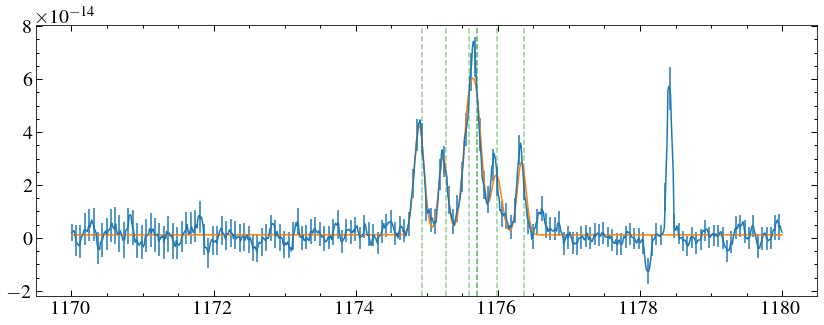

-4.579661304083437 km / s 0.8819495624558931 km / s


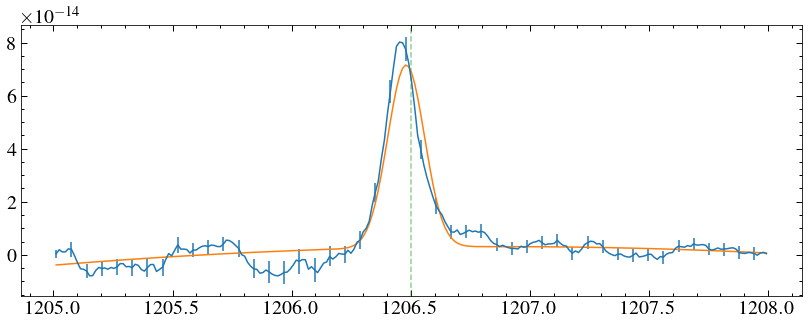

-8.380318865846082 km / s 0.3570526815177386 km / s
-9.788077579392876 km / s 0.4896326142202643 km / s


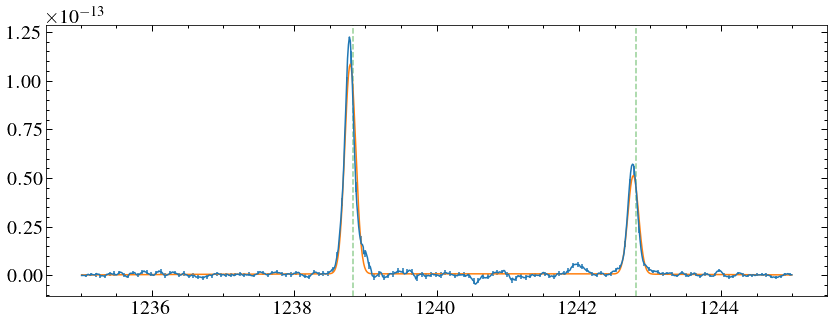

19.23742802180787 km / s 3.26980632020203 km / s


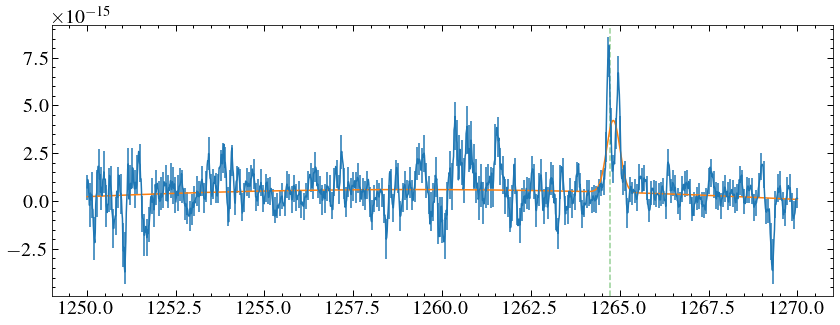

-11.835675449109226 km / s 4.379028925216282 km / s
-3.035700120700184 km / s 1.6764329084301344 km / s


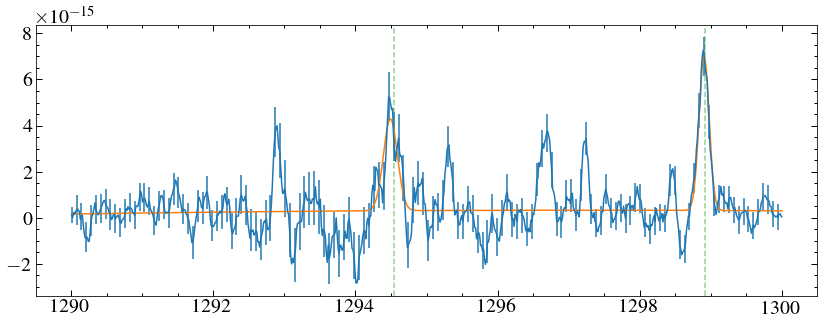

-26.6529882267396 km / s 13.706362849805242 km / s


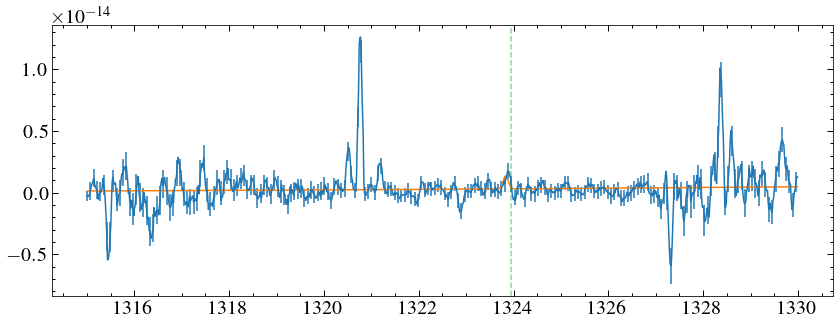

-2.937301305477011 km / s 0.4345225417923513 km / s
-9.087852062392859 km / s 0.34035220884119877 km / s


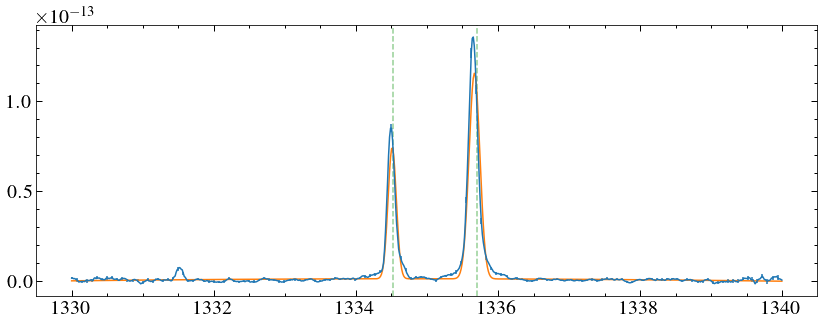

-5.5260386263283205 km / s 0.41458661817309483 km / s
-5.41966797694621 km / s 0.7997457905089789 km / s


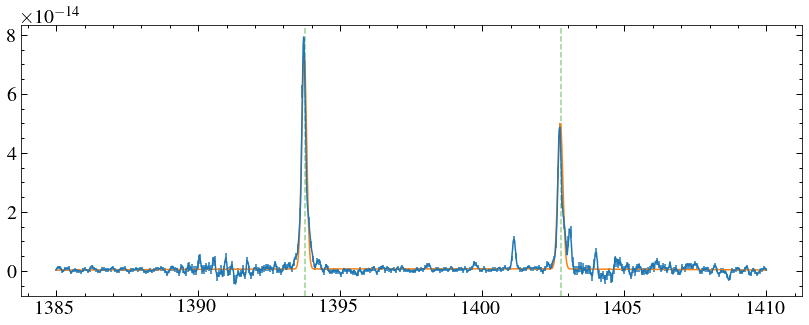

/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in true_divide


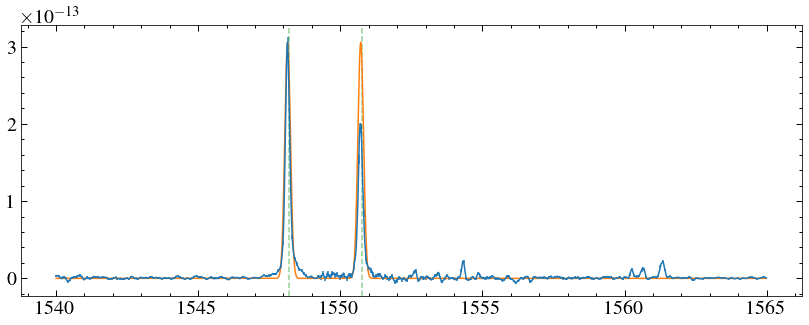

/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in true_divide
/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/modeling/fitting.py:894: RuntimeWarning: invalid value encountered in multiply
  return np.ravel(weights * (model(*args[2: -1]) - meas))


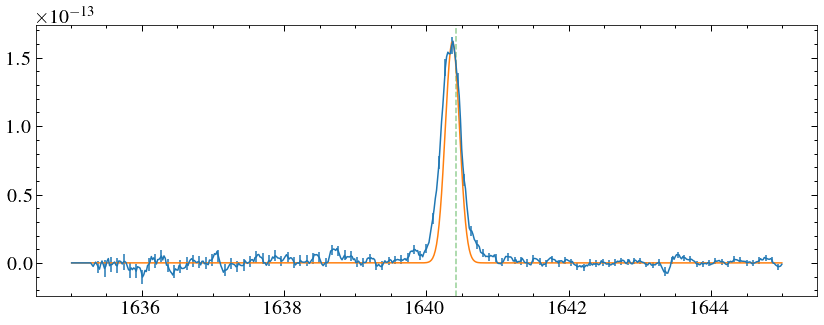

/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in true_divide
/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/modeling/fitting.py:894: RuntimeWarning: invalid value encountered in multiply
  return np.ravel(weights * (model(*args[2: -1]) - meas))


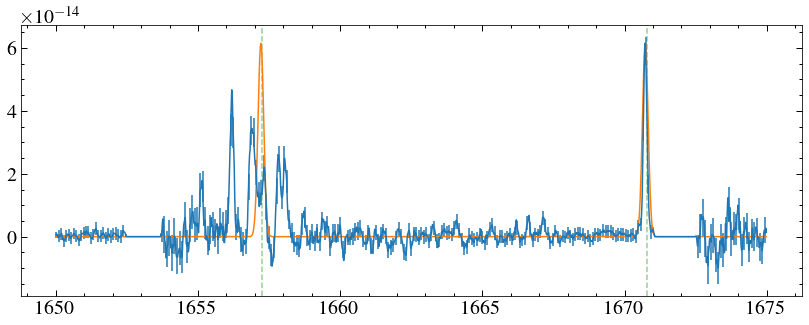

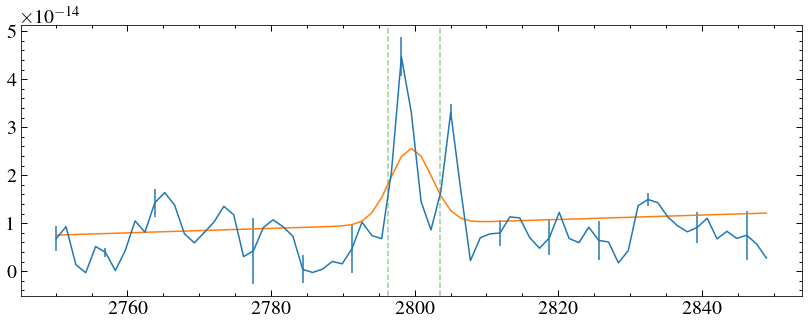

In [83]:
#50 AA chunks?
fitter = fitting.LevMarLSQFitter()
start = 1150
step = 60
w, f, e, inst = data['WAVELENGTH'], data['FLUX'], data['ERROR'], data['INSTRUMENT']
# lines = line_list[(line_list['Likelihood to measure'] == 'High') | (line_list['Likelihood to measure'] == 'Medium')]['Wavelength']
lines = line_list[(line_list['Likelihood to measure'] == 'High')]['Wavelength']


chunks = [[1170, 1180], [1205, 1208], [1235, 1245], [1250, 1270], [1290, 1300], [1315, 1330], [1330, 1340], [1350, 1352.5], [1385, 1410], [1520, 1540], 
          [1540, 1565], [1635, 1645], [1650, 1675], [2750, 2850]]


dv_guess = -10*u.km/u.s

smooth =7 

dvs = []
dv_es = []

for chunk in chunks:
    start, end = chunk[0], chunk[1]
    mask = (w >= start) & (w <= end)

    lmask = (lines >= start) & (lines <= end)
    if len(lines[lmask]) > 0:
    #         plt.plot(w[mask], f[mask])
        fi, ei = f[mask], e[mask]

    #         mod = models.Const1D(0)
        mod = models.Polynomial1D(2)
        std_guess = 0.5
        if np.median(inst[mask]) in [1, 2, 16]:
            std_guess = 0.1
            fi = convolve(fi,Box1DKernel(smooth))
            ei = convolve(ei,Box1DKernel(smooth))/smooth**0.5

        plt.errorbar(w[mask], fi, yerr =ei, errorevery=5)
    #         print(std_guess)
        for line in lines[lmask]:
            line_guess = dv_guess.to(u.AA, equivalencies = u.doppler_optical(line*u.AA)).value
            mod = mod+  models.Gaussian1D(amplitude=np.max(fi), mean = line_guess, stddev=std_guess)
#             mod = mod + functional_models.Voigt1D(x_0=line_guess, amplitude_L=np.max(fi), fwhm_G=std_guess, fwhm_L=std_guess*0.5)#, bounds=dict(amplitude_L=[0, 1]))
            plt.axvline(line, ls='--', c='C2', alpha =0.5)
    #             plt.axvline(line_guess, ls='--', c='C3', alpha =0.5)
        gg_fit = fitter(mod, w[mask], fi, weights = 1/ei, maxiter=1000)
#         print(gg_fit)
        if type(fitter.fit_info['param_cov']) == np.ndarray:
        #     print('hooray!')
            fit_e = np.sqrt(np.diag(fitter.fit_info['param_cov']))
            mean_es = fit_e[3:][1::3]
        
    #         print(gg_fit)
            for i in range(len(lines[lmask])):
#                 mean = gg_fit[i+1].x_0
                mean = gg_fit[i+1].mean
                mean_e = mean_es[i]
#                 line_e = 
        #             obs_line = gg_fit[i+1].mean*u.AA
        
                dv = (mean*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[lmask][i]*u.AA))
                eup = ((mean+mean_e)*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[lmask][i]*u.AA))
                edo = ((mean-mean_e)*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[lmask][i]*u.AA))
                dve= np.mean([abs(dv-eup).value, abs(dv-edo).value])*u.km/u.s   
                print(dv, dve)
                dvs.append(dv)
                dv_es.append(dve)
        
        
        
        plt.plot(w[mask], gg_fit(w[mask]))
        plt.show()
#     start += step
    

What about just doublets to get the rv?

In [77]:
dvs = np.array([dv.value for dv in dvs])

27.04878978784553 -6.773152808586205 153.22005301953774


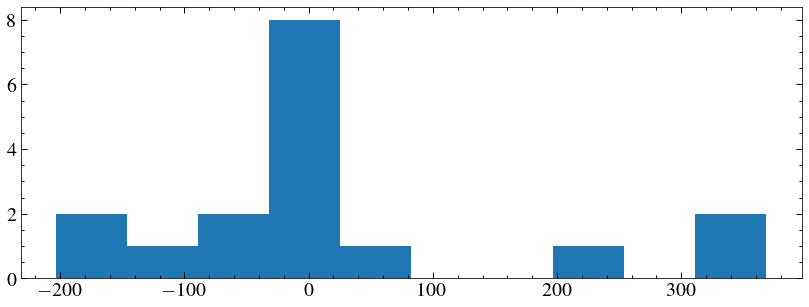

In [78]:
plt.hist(dvs)
print(np.mean(dvs), np.median(dvs), np.std(dvs))

In [62]:
np.mean([1298.892,
1298.944])

1298.9180000000001

In [67]:
dvs

array([ 4.15655361e+05, -1.56351927e+01,  4.15454472e+05, -1.85929042e+01,
        4.15255521e+05, -2.15659747e+01,  4.15181931e+05,  3.18583095e+00,
        4.15181931e+05,  3.18583096e+00,  4.15014129e+05,  1.70113846e+01,
        4.14781404e+05,  1.32241598e+01,  3.96938069e+05,  2.55205097e+00,
        3.78759717e+05, -6.79628837e+00,  3.76585059e+05, -5.73367058e+00,
        3.64855357e+05,  1.38194687e+01,  3.49552279e+05, -8.89112611e-01,
        3.47365164e+05,  3.73977546e-01,  3.35128358e+05,  5.36998675e+01,
        3.30098562e+05, -6.95009092e+00,  3.29539742e+05, -1.15961900e+01,
        3.03329815e+05, -4.32485071e+01,  2.99453807e+05, -8.27408489e+01,
        2.43163323e+05, -1.19232194e+02,  2.42263166e+05,  1.68500164e+02,
        2.12640141e+05, -2.72685547e+01,  2.07430685e+05, -6.63218371e+01,
        2.03326541e+05, -4.50219312e+00,  8.15364235e+02,  4.96693850e+01,
        4.54904813e+01,  4.54904813e+01])